In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concertriccir2/concertriccir2.csv


## 🧠 Batch Normalization in Deep Learning

### 📌 Definition:

**Batch Normalization (BN)** is a technique to make deep neural networks train faster and more stable by normalizing the inputs of each layer. It reduces internal covariate shift by keeping the mean and variance of each layer's input consistent during training.

---

### 🔍 Why Batch Normalization?

- Deep networks suffer from **internal covariate shift** (change in distribution of layer inputs during training).
- BN helps:
  - Reduce training time.
  - Improve gradient flow.
  - Act as a form of regularization (sometimes reduces need for dropout).
  - Allow use of higher learning rates.

---

### ⚙️ How It Works: Step-by-Step

Let input to a layer be a mini-batch `X = [x₁, x₂, ..., xₘ]`

For each feature (neuron activation):

1. **Compute Mean:**

   $$
   \mu = \frac{1}{m} \sum_{i=1}^{m} x_i
   $$

2. **Compute Variance:**

   $$
   \sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2
   $$

3. **Normalize:**

   $$
   \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}
   $$

   (ε is a small number for numerical stability.)

4. **Scale and Shift:**

   $$
   y_i = \gamma \hat{x}_i + \beta
   $$

   - γ (scale) and β (shift) are **learnable parameters**.
   - They restore the representation power of the network.

---

### 🛠️ Where to Apply?

Usually applied **after linear/convolution layer** and **before activation function**.

```python
# PyTorch example
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(64, 128),
    nn.BatchNorm1d(128),    # Apply BN after Linear
    nn.ReLU()
)
```

---

### 📈 During Inference:

- Instead of using batch statistics (mean & variance), we use **running averages** computed during training.

---

### ✅ Benefits

- **Faster convergence**
- **Higher learning rates** are safer
- **Less sensitivity to initialization**
- Acts like **regularization**, reducing need for Dropout

---

### ⚠️ Limitations

- Less effective on very **small batch sizes**
- Adds some **computation overhead**


# ✅ Batch Normalization Summary

👉 **Batch Normalization is like the big brother of StandardScaler** —  
instead of normalizing the whole dataset once, it normalizes the outputs of each layer dynamically using the mean and variance of mini-batches, then rescales with learnable parameters to stabilize training and improve generalization.

---

## 🔹 Sacrificing Present for Future

- **Training accuracy may drop** → because BN adds noise and regularizes.  
- **Validation/test accuracy improves** → because the model generalizes better.  

*Sacrifice the present (training accuracy) for a better future (validation accuracy).*

---

## 🔹 StandardScaler vs BatchNorm

- **StandardScaler** → one-time normalization on input features using *global mean & variance*.  
- **BatchNorm** → repeated normalization at every layer using *mini-batch mean & variance* during training, then applies **γ (scale)** & **β (shift)** to keep flexibility.  

---

## 🔹 Where BN Works

- It operates on the **output (activations) of the previous layer**, not just the raw input data.  
- This stabilizes distributions layer by layer, fixing the **internal covariate shift** problem.  

---

## 🔹 Quick Flow Diagram

## Input (x)
    |
    ▼
## Compute batch mean (μ) & variance (σ²)
    |
    ▼
## Normalize: (x - μ) / sqrt(σ² + ε)
    |
    ▼
## Scale & Shift: y = γ * normalized + β
    │
    ▼
## Output → Next Layer

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadsajad/concertriccir2")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/concertriccir2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"/kaggle/input/concertriccir2/concertriccir2.csv",header=None)

In [4]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation

2025-08-21 20:12:47.120959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755807167.314988      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755807167.370527      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
model=Sequential()

In [6]:
model.add(Dense(3,activation="relu",input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
model.add(BatchNormalization())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755807179.476301      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [7]:
model.layers

[<Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dense name=dense_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>]

In [8]:
columns=['X','Y','Class']
df.columns=columns

In [9]:
df['X']=df['X'].round(2)
df['Y']=df['Y'].round(3)
df

,X,Y,Class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.158,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.847,1.0
...,...,...,...
495,2.18,2.984,1.0
496,1.78,2.869,1.0
497,0.89,3.070,0.0
498,0.85,3.875,0.0


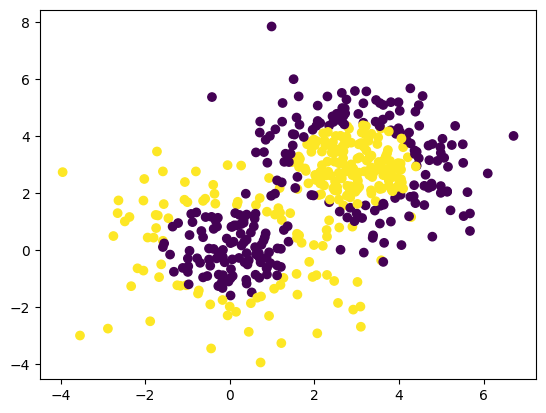

In [10]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,-1].values

In [13]:
history=model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100


I0000 00:00:1755807183.959847      58 service.cc:148] XLA service 0x7cf68c00d750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755807183.960409      58 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755807184.279550      58 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.4688 - loss: 7.2521

I0000 00:00:1755807185.200682      58 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.4774 - loss: 7.2979 - val_accuracy: 0.4400 - val_loss: 0.7964
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4324 - loss: 7.5356 - val_accuracy: 0.4600 - val_loss: 0.7815
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4941 - loss: 6.4481 - val_accuracy: 0.4900 - val_loss: 0.7726
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4931 - loss: 6.9762 - val_accuracy: 0.5000 - val_loss: 0.7762
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5094 - loss: 6.3581 - val_accuracy: 0.4900 - val_loss: 0.7791
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4560 - loss: 7.0580 - val_accuracy: 0.4700 - val_loss: 0.7803
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4955 - loss: 6.4851 - val_accuracy: 0.4100 - val_loss: 0.7822
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4469 - loss: 7.5674 - val_accuracy: 0.4000 - val_loss: 0

In [14]:
model2=Sequential()

In [15]:
model2.add(Dense(3,activation="relu",input_dim=2))

model2.add(Dense(2,activation="relu"))

model2.add(Dense(1,activation="sigmoid"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
model2.layers

[<Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [18]:
history2=model2.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5127 - loss: 1.5294 - val_accuracy: 0.5700 - val_loss: 1.4329
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5104 - loss: 1.3452 - val_accuracy: 0.5700 - val_loss: 1.2902
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4770 - loss: 1.3605 - val_accuracy: 0.5700 - val_loss: 1.1613
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4749 - loss: 1.2052 - val_accuracy: 0.5700 - val_loss: 1.0477
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4288 - loss: 1.1626 - val_accuracy: 0.5700 - val_loss: 0.9499
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4144 - loss: 1.0563 - val_accuracy: 0.5700 - val_loss: 0.8662
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4021 - loss: 1.0104 - val_accuracy: 0.5700 - val_loss: 0.7956
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4278 - loss: 0.9087 - val_accuracy: 0.5600 - 